In [1]:
import pandas as pd
import statistics
import math
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import pylab as rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
#IMPORTA os dados de reanalise
brasil = pd.read_csv("brasil.csv", names=['data', 'temp'],skiprows =[0])
brasil

,data,temp
252,1961-01-01,24.042850
253,1961-02-01,23.654947
254,1961-03-01,23.456133
255,1961-04-01,22.627722
256,1961-05-01,21.792189
...,...,...
991,2022-08-01,21.363998
992,2022-09-01,22.228985
993,2022-10-01,23.117392
994,2022-11-01,23.330244


In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
#Teste de estacionariedade para Curitiba reanalise
result = adfuller(brasil['temp'])
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')

Dickey-Fuller Aumentado
Teste Estatístico: -4.2556
Valor-p: 0.0005
Valores Críticos:


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

In [6]:
#reanalise
df_rea = pd.read_csv('brasil.csv', names=['data', 'temp'],skiprows =[0])
df_rea['data'] = pd.to_datetime(df_rea['data'])
df_rea.set_index(df_rea['data'], inplace = True)
ts_rea = df_rea['temp']

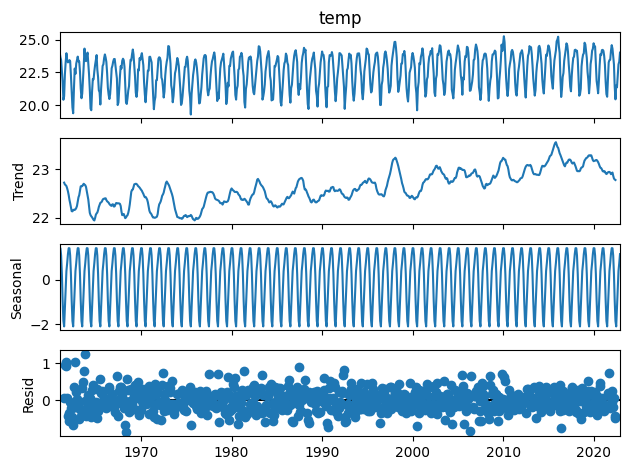

In [7]:
sd_rea = seasonal_decompose(df_rea['temp']).plot()
trend_brasil = seasonal_decompose(df_rea['temp']).trend

<Axes: xlabel='data'>

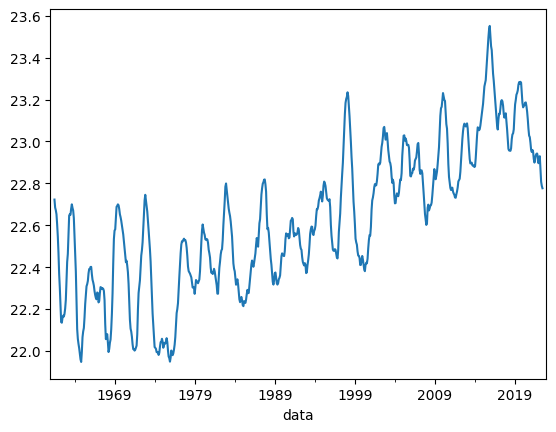

In [8]:
trend_brasil.plot()

Investigando quebras estruturais na série de Curitiba:

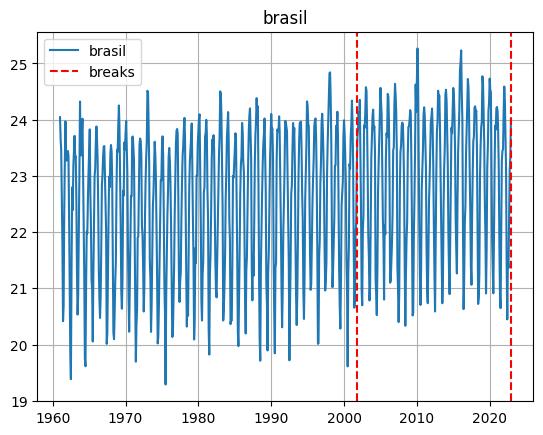

In [9]:
#Reanalise
n_breaks = 2
y = np.array(ts_rea.tolist())

import ruptures as rpt

model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=n_breaks-1)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts_rea.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)

#Time series
plt.plot(ts_rea, label='brasil')
plt.title('brasil')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

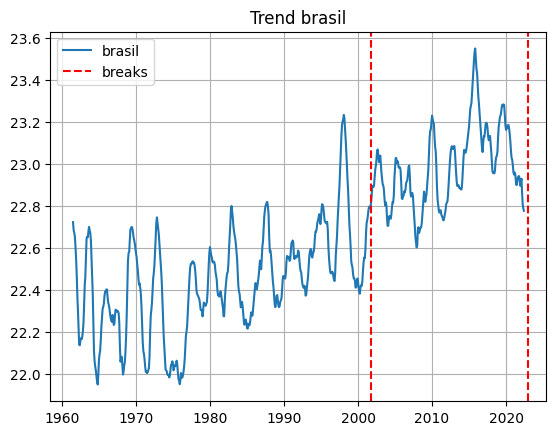

DatetimeIndex(['2001-10-01', '2022-12-01'], dtype='datetime64[ns]', freq=None)

In [10]:
#Trend series
plt.plot(trend_brasil, label='brasil')
plt.title('Trend brasil')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()
breaks_rpt

In [11]:
df_rea[:490]['temp']

data
1961-01-01    24.042850
1961-02-01    23.654947
1961-03-01    23.456133
1961-04-01    22.627722
1961-05-01    21.792189
                ...    
2001-06-01    20.655258
2001-07-01    20.876646
2001-08-01    21.967655
2001-09-01    22.164661
2001-10-01    23.139510
Name: temp, Length: 490, dtype: float64

In [12]:
# Import math Library
import math
####Testes antes e depois do break.
testes_break = pd.DataFrame(df_rea['temp'])
antes = testes_break[:490]
depois = testes_break[490:]
media_antes = np.mean(antes)
media_depois = np.mean(depois)
var_antes = np.var(antes)
var_depois = np.var(depois)
print('Media antes: %5f' %media_antes)
print('Media depois: %5f' %media_depois)
print('Var antes: %5f' %var_antes)
print('Var depois: %5f' %var_depois)
print('Dp antes: %5f' %math.sqrt(var_antes))
print('Dp depois: %5f' %math.sqrt(var_depois))

Media antes: 22.436594
Media depois: 22.989030
Var antes: 1.646895
Var depois: 1.622154
Dp antes: 1.283314
Dp depois: 1.273638


In [13]:
#Testes na trend:
trend_test = pd.DataFrame(trend_brasil)
trend_antes = trend_brasil[:490]
trend_depois = trend_brasil[490:]#
media_trend_antes = np.mean(trend_antes)
media_trend_depois = np.mean(trend_depois)
var_trend_antes = np.var(trend_antes)
var_trend_depois = np.var(trend_depois)
print('Media trend antes: %5f' %media_trend_antes)
print('Media trend depois: %5f' %media_trend_depois)
print('Var trend antes: %5f' %var_trend_antes)
print('Var trend depois: %5f' %var_trend_depois)
print('Dp antes: %5f' %math.sqrt(var_trend_antes))
print('Dp depois: %5f' %math.sqrt(var_trend_depois))

Media trend antes: 22.438094
Media trend depois: 22.987429
Var trend antes: 0.060862
Var trend depois: 0.034695
Dp antes: 0.246701
Dp depois: 0.186265


In [14]:
##Escrevendo curitiba como .dat
data = np.loadtxt('brasil.csv', delimiter=',', dtype=str,skiprows=1)
df = pd.DataFrame(data)
df.rename({0:'Col',1:'Data',2:'Temp'}, axis=1, inplace=True)
df= df.drop(['Col'], axis=1)
np.savetxt('brasil.dat', df, delimiter='    ', fmt='%s')

#####################
#####Região Sul######
#####################

In [16]:
sd_rea = seasonal_decompose(df_rea['temp'])

# Export components
trend = sd_rea.trend
seasonal = sd_rea.seasonal
resid = sd_rea.resid

trend = trend.dropna()
seasonal = seasonal.dropna()
resid = resid.dropna()

# Save each component to a CSV file
np.savetxt('trend.dat', trend, delimiter='    ', fmt='%s')
np.savetxt('seasonal.dat', seasonal, delimiter='    ', fmt='%s')
np.savetxt('resid.dat', resid, delimiter='    ', fmt='%s')